In [1]:
%load_ext lab_black
%load_ext autoreload

The autoreload module is not an IPython extension.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

plt.style.use("seaborn")
plt.style.use("seaborn-poster")

from src import df_cleaner

In [10]:
df = pd.read_csv("abalone.csv")
df = df_cleaner.snake_case(df)
df = pd.get_dummies(df)

In [11]:
target = "rings"
cols = df.columns.to_list()
features = cols.copy()
features.remove(target)

X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [12]:
model = RandomForestRegressor()

In [13]:
def cross_val(model_name, model, X_train, y_train, cv):
    """Cross validate a model and gives scores and average score

    Keyword arguments:
    model_name -- string of the name, for printing out
    model -- model i.e. xgb, forest
    X_train -- data to use with no target
    y_train -- target
    cv -- number of cross validations
    """
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"{model_name} Scores:")
    for i in scores:
        print(round(i, 2))
    print(f"Average {model_name} score: {round(scores.mean(),2)}")

In [14]:
cross_val("Random Forest", model, X_train, y_train, 4)

Random Forest Scores:
0.54
0.55
0.53
0.51
Average Random Forest score: 0.53


In [15]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [16]:
result_df = X_test.copy()
result_df = result_df.merge(y_test, left_index=True, right_index=True)
result_df["Predicted Values"] = preds

In [17]:
result_df["Residuals"] = result_df[target] - result_df["Predicted Values"]

(0, 25)

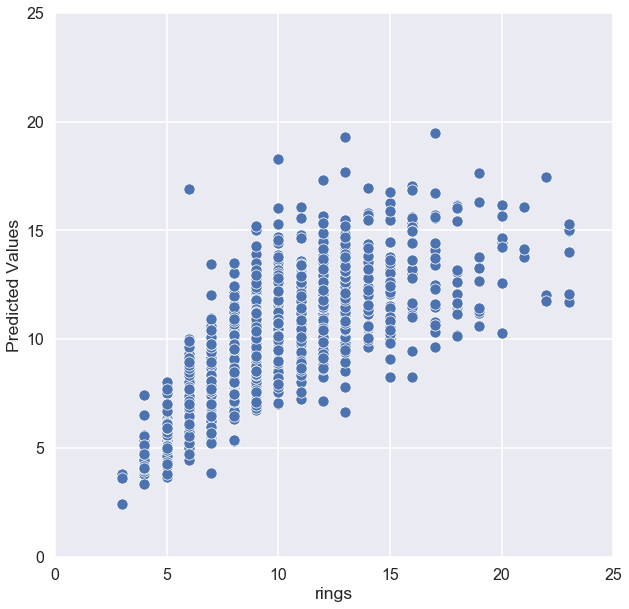

In [19]:
fig = plt.figure(figsize=[10, 10])
sns.scatterplot(x="rings", y="Predicted Values", data=result_df)
plt.xlim(0, 25)
plt.ylim(0, 25)

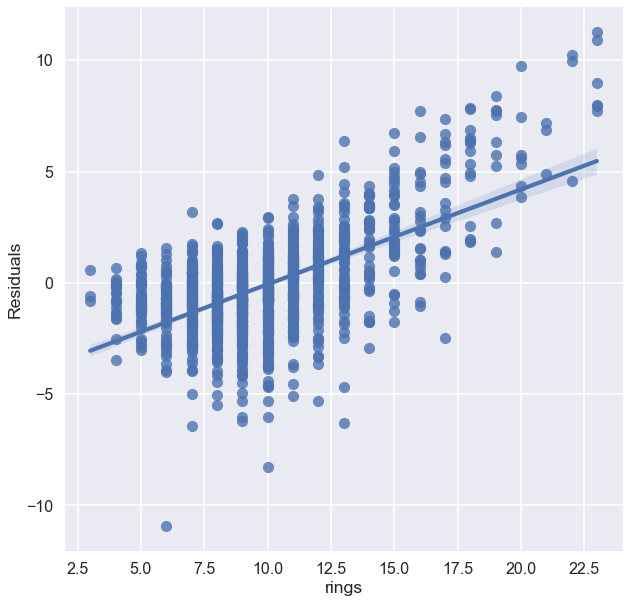

In [20]:
fig = plt.figure(figsize=[10, 10])
sns.regplot(x="rings", y="Residuals", data=result_df)